<a href="https://colab.research.google.com/github/salmaan79/Advanced-House-Price-prediction/blob/main/MLFA_Autmumn_2021_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Read image

In [38]:
img = cv2.imread('lena_grayscale.png',cv2.IMREAD_GRAYSCALE)

In [3]:
img.shape

(256, 256)

In [4]:
img[0:100,0:100] = 0

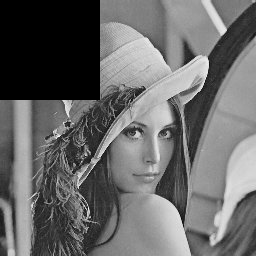

In [5]:
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyWindow()
from google.colab.patches import cv2_imshow
import cv2

cv2_imshow(img)


Write image

In [6]:
cv2.imwrite('test-image-enh.png',img)

True

In [7]:
print(img)

[[  0   0   0 ... 169 165 128]
 [  0   0   0 ... 178 171 124]
 [  0   0   0 ... 143 119  65]
 ...
 [ 49  49  51 ...  88  91  90]
 [ 45  49  51 ...  99  99  95]
 [ 42  49  52 ... 102 108 110]]


Calculate histogram

In [23]:
histr=cv2.calcHist([img],[0],None, [256], [0,256])

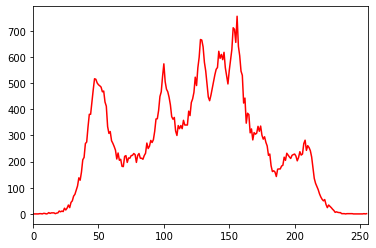

In [24]:
plt.plot(histr,color = 'red')
plt.xlim([0,256])
plt.show()


In [25]:
img = img.T

In [26]:
img[200:255,200:255] = 0

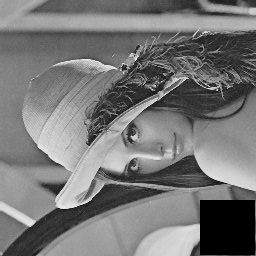

In [27]:
from google.colab.patches import cv2_imshow
import cv2

cv2_imshow(img)


shuffle

In [13]:
np.random.shuffle(img)

In [14]:
img.shape

(256, 256)

image flip

In [29]:
img1 = cv2.flip(img, -1) #0, 1 and -1

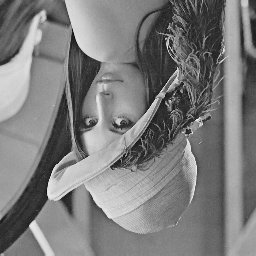

In [30]:
cv2_imshow(img1)
#cv2.waitKey(0)
#cv2.destroyWindow()

image resize

In [31]:
img1 = cv2.resize(img,(2*img.shape[0], 2*img.shape[1]),interpolation = cv2.INTER_LINEAR)

# Affine transformations

translation

In [32]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])

In [33]:
img1 = cv2.warpAffine(img,M,(cols,rows))

reflection as an affine transform

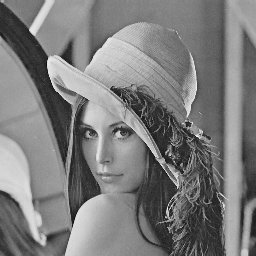

In [34]:
input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
output_pts = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
 
# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts , output_pts)
img1 = cv2.warpAffine(img, M, (cols,rows))
cv2_imshow(img1)

playing with affine transforms

In [35]:
input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
output_pts = np.float32([[0,100],[cols-1,0], [0,rows-1]])
 
# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts , output_pts)
img1 = cv2.warpAffine(img, M, (cols,rows))


rotation

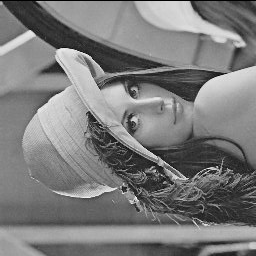

In [36]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img1 = cv2.warpAffine(img, M, (cols,rows))
cv2_imshow(img1)

# Image filtering

smoothing

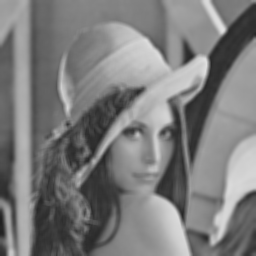

In [37]:
img1 =cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
cv2_imshow(img1)

contrast enhancement

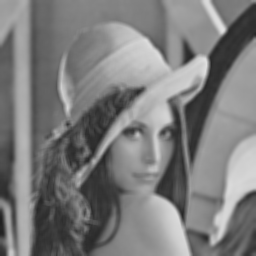

In [39]:
equ = cv2.equalizeHist(img)
cv2_imshow(img1)

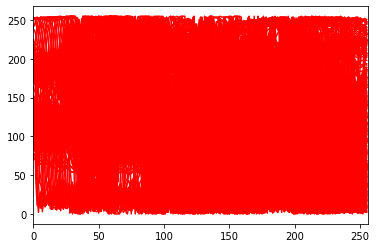

In [40]:
plt.plot(equ,color = 'red')
plt.xlim([0,256])
plt.show()


In [41]:
img1 = equ

In [42]:
equ.shape

(256, 256)

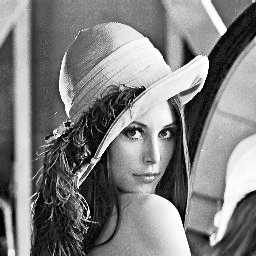

In [43]:
#cv2.imshow('image',equ)
#cv2.waitKey(0)
#cv2.destroyWindow()
cv2_imshow(img1)

In [44]:
cv2.imwrite('test-image-enh.png',equ)

True

crop

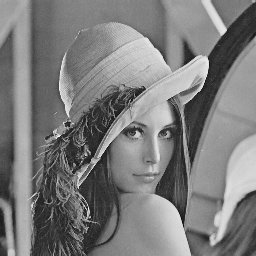

In [45]:
img[20:50, 50:70]
cv2_imshow(img)

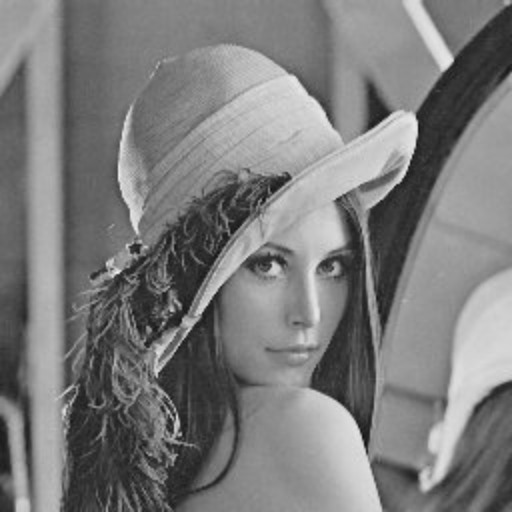

In [46]:
img1 = cv2.resize(img,(2*img.shape[0], 2*img.shape[1]),interpolation = cv2.INTER_LINEAR)
cv2_imshow(img1)

In [47]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])

In [48]:
img1 = cv2.warpAffine(img,M,(cols,rows))

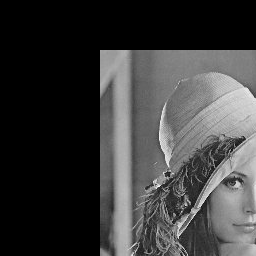

In [49]:
cv2_imshow(img1)

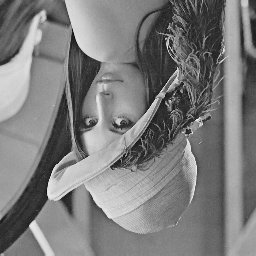

In [50]:
img1 = cv2.flip(img, -1) #0, 1 and -1
cv2_imshow(img1)